### Name    : Sarukh Mureed
### Roll No : 128
### Section : 3B


### `IMPORTING LIBRARIES`



In [2]:

# importing librarie

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



### `IMPORTING DATA`


In [3]:
# importing data
Dataset = pd.read_csv("data.csv") 

### `PRINTING FIRST 5 ROWS OF THE DATASET`


In [4]:
# printing head values from the data set - 5
Dataset.head(5) 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,NaN,NaN,NaN,NaN,NaN,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


### `PRINTING LAST 5 ROWS OF THE DATASET`


In [5]:
# printing head values from the data set - 5
Dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,7/9/2014 0:00,308166.6667,3,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,534333.3333,3,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0,2009.0,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,416904.1667,3,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,203400.0000,4,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,5148 S Creston St,Seattle,WA 98178,USA
4599,7/10/2014 0:00,220600.0000,3,2.50,1490.0,8102.0,2.0,0.0,0.0,4.0,1490.0,0.0,1990.0,0.0,18717 SE 258th St,Covington,WA 98042,USA


### `PRINTING TOTAL ROWS AND COLUMNS`


In [6]:
# printing rows and cloumns
print('rows: ', Dataset.shape[0]) 
print('columns: ', Dataset.shape[1])

rows:  4600
columns:  18


### `CHECKING NULL VALUES IN THE DATASET`


In [7]:
# checking null values
Dataset.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms        47
sqft_living      47
sqft_lot         47
floors           47
waterfront       47
view             48
condition        48
sqft_above       48
sqft_basement    48
yr_built         48
yr_renovated     48
street           48
city              0
statezip          0
country           0
dtype: int64

### `CHECKING DATA TYPES OF EACH COLUMN`


In [8]:
# checking data types 
Dataset.dtypes


date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

### `REPLACING MISSING VALUES WITH MEAN / MEDIAN / MODE`


In [9]:
# replacing with mean mode media, 
Dataset['price'].fillna(Dataset['price'].median(), inplace=True)
Dataset['bedrooms'].fillna(Dataset['bedrooms'].median(), inplace=True)
Dataset['bathrooms'].fillna(Dataset['bathrooms'].median(), inplace=True)
Dataset['sqft_living'].fillna(Dataset['sqft_living'].mean(), inplace=True)
Dataset['sqft_lot'].fillna(Dataset['sqft_lot'].mean(), inplace=True)
Dataset['floors'].fillna(Dataset['floors'].median(), inplace=True)
Dataset['waterfront'].fillna(Dataset['waterfront'].mode()[0], inplace=True)
Dataset['view'].fillna(Dataset['view'].median(), inplace=True)
Dataset['condition'].fillna(Dataset['condition'].median(), inplace=True)
Dataset['sqft_above'].fillna(Dataset['sqft_above'].mean(), inplace=True)
Dataset['sqft_basement'].fillna(Dataset['sqft_basement'].mean(), inplace=True)
Dataset['yr_built'].fillna(Dataset['yr_built'].median(), inplace=True)
Dataset['yr_renovated'].fillna(Dataset['yr_renovated'].median(), inplace=True)

for col in ['date', 'street', 'city', 'statezip', 'country']:
    Dataset[col].fillna(Dataset[col].mode()[0], inplace=True)


C:\Users\Sarukh\AppData\Local\Temp\ipykernel_12736\1441795485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['price'].fillna(Dataset['price'].median(), inplace=True)
C:\Users\Sarukh\AppData\Local\Temp\ipykernel_12736\1441795485.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

# Continue from Task 9 

In [10]:
print(Dataset.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [11]:
columns = ['waterfront', 'view', 'condition', 'floors', 'city', 'statezip', 'country', 'yr_renovated']

for col in columns:
    unique_vals = Dataset[col].unique()
    print(f"Unique values in '{col}': {unique_vals}\n")

Unique values in 'waterfront': [0. 1.]

Unique values in 'view': [0. 4. 1. 2. 3.]

Unique values in 'condition': [3. 5. 4. 2. 1.]

Unique values in 'floors': [1.5 2.  1.  2.5 3.  3.5]

Unique values in 'city': ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']

Unique values in 'statezip': ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 

In [12]:
mode_value = Dataset['waterfront'].mode()[0]
Dataset['waterfront'] = Dataset['waterfront'].fillna(mode_value)

In [13]:
num_cols_to_int = [
    'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated'
]

for col in num_cols_to_int:
    Dataset[col].fillna(0, inplace=True)

for col in num_cols_to_int:
    Dataset[col] = Dataset[col].astype(np.int64)

print(Dataset.dtypes)

date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
statezip         object
country          object
dtype: object


C:\Users\Sarukh\AppData\Local\Temp\ipykernel_12736\827523718.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset[col].fillna(0, inplace=True)


In [14]:
columns_to_drop = ['street', 'statezip', 'date']
cleaned_Dataset = Dataset.drop(columns=columns_to_drop, axis=1)
print(cleaned_Dataset.columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'country'],
      dtype='object')


In [15]:
for col in ['waterfront', 'view', 'condition', 'floors', 'city', 'statezip', 'country']:
    mode_value = Dataset[col].mode()[0]
    Dataset[col] = Dataset[col].fillna(mode_value)


In [16]:
numeric_cols = ['waterfront', 'view', 'condition', 'floors', 'yr_renovated']

for col in numeric_cols:
    Dataset[col] = Dataset[col].astype(np.int64)


In [17]:
numeric_cols = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'waterfront', 'view', 'condition', 'sqft_above', 
                'sqft_basement', 'yr_built', 'yr_renovated']

for col in numeric_cols:
    Dataset[col] = Dataset[col].fillna(0).astype(int)


In [18]:
cat_cols = ['street', 'city', 'statezip', 'country']

for col in cat_cols:
    Dataset[col] = Dataset[col].fillna(Dataset[col].mode()[0])


In [19]:

print(Dataset.dtypes)

print(Dataset.describe())

print(Dataset.head())


date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
statezip         object
country          object
dtype: object
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     1.792174   2140.727391  1.485241e+04   
std    5.638347e+05     0.908848     0.750345    960.385021  3.584251e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.000000   1470.000000  5.012500e+03   
50%    4.609430e+05     3.000000     2.000000   1990.000000  7.700000e+03   
75%    6.549625

In [20]:

X = Dataset.drop('price', axis=1)
print("X shape:", X.shape)

Y = Dataset['price']
print("Y shape:", Y.shape)


X shape: (4600, 17)
Y shape: (4600,)


In [21]:

cat_columns = X.select_dtypes(['object']).columns
for col in cat_columns:
    X[col] = pd.factorize(X[col])[0]


# Continue from task 10

bernoulli
accuracy: 0.33, precision: 0.14, recall: 0.33, f1: 0.17

random forest
accuracy: 0.76, precision: 0.74, recall: 0.76, f1: 0.73

gaussian
accuracy: 0.38, precision: 0.33, recall: 0.38, f1: 0.32

decision tree
accuracy: 0.88, precision: 0.88, recall: 0.88, f1: 0.88

multinomial
accuracy: 0.21, precision: 0.36, recall: 0.21, f1: 0.25

knn
accuracy: 0.32, precision: 0.27, recall: 0.32, f1: 0.29



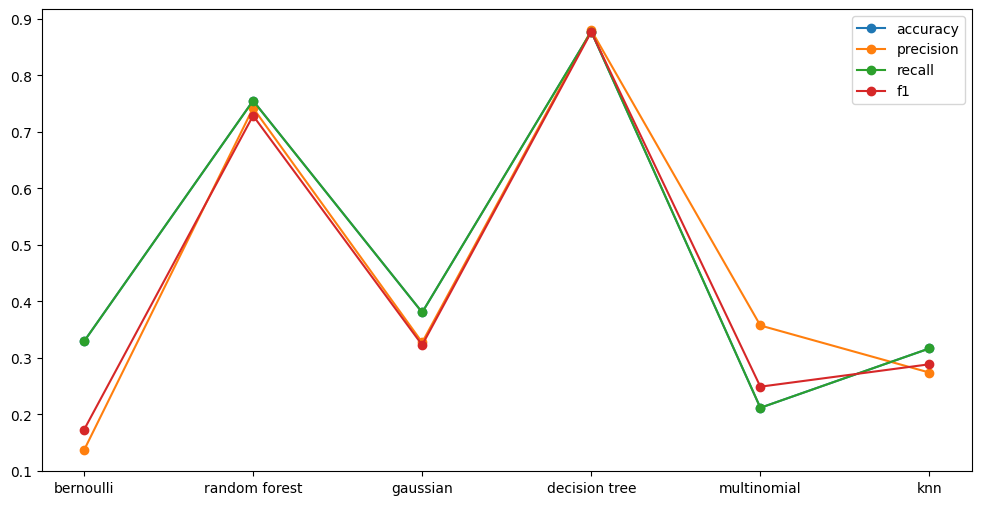

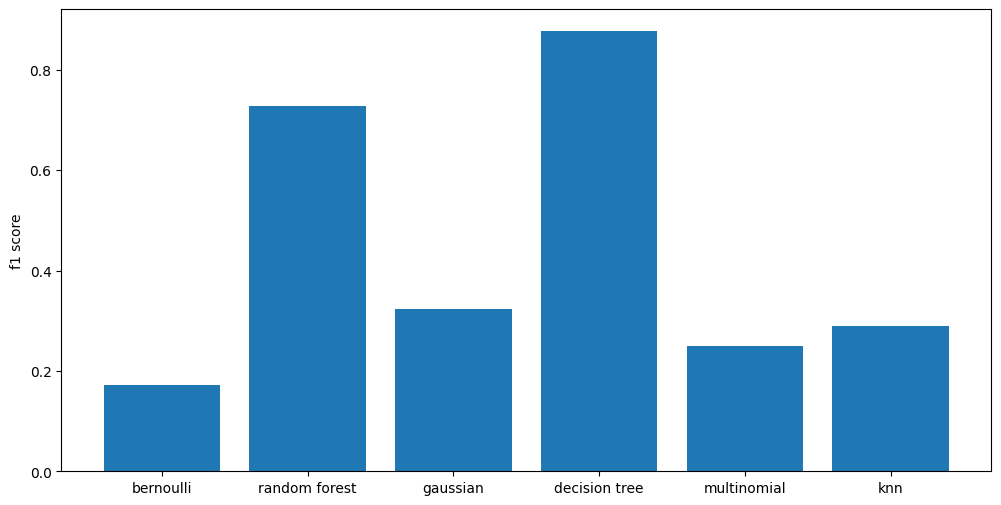

In [30]:
# set target and features
y = Dataset['city']
x = Dataset.drop(columns=['city'])

# convert categorical features to numbers
cat_cols = x.select_dtypes(['object']).columns
for col in cat_cols:
    x[col] = pd.factorize(x[col])[0]

# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, shuffle=True, random_state=42
)

# dictionary to store model results
models = {}

# bernoulli nb
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
y_pred = bnb.predict(X_test)
models['bernoulli'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
models['random forest'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# gaussian nb
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
models['gaussian'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)
models['decision tree'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# multinomial nb
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
y_pred = mnb.predict(X_test)
models['multinomial'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# knn
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
models['knn'] = [
    accuracy_score(Y_test, y_pred),
    precision_score(Y_test, y_pred, average='weighted', zero_division=0),
    recall_score(Y_test, y_pred, average='weighted', zero_division=0),
    f1_score(Y_test, y_pred, average='weighted', zero_division=0)
]

# print results
for model, scores in models.items():
    print(model)
    print(f"accuracy: {scores[0]:.2f}, precision: {scores[1]:.2f}, recall: {scores[2]:.2f}, f1: {scores[3]:.2f}\n")

# prepare data for plots
model_names = list(models.keys())
accuracy = [v[0] for v in models.values()]
precision = [v[1] for v in models.values()]
recall = [v[2] for v in models.values()]
f1 = [v[3] for v in models.values()]

# line plot
plt.figure(figsize=(12,6))
plt.plot(model_names, accuracy, marker='o', label='accuracy')
plt.plot(model_names, precision, marker='o', label='precision')
plt.plot(model_names, recall, marker='o', label='recall')
plt.plot(model_names, f1, marker='o', label='f1')
plt.legend()
plt.show()

# bar plot for f1
plt.figure(figsize=(12,6))
plt.bar(model_names, f1)
plt.ylabel('f1 score')
plt.show()
